## Project 1 pilot study single subject single ROI

In [2]:
# load all the packages and libraries going to be used
%pylab inline
from mvpa2.suite import *
import os.path as op
import sklearn
import seaborn as sns
from pywt import wavedecn
from scipy import stats
from mpl_toolkits import mplot3d

Populating the interactive namespace from numpy and matplotlib


/anaconda3/envs/py2/lib/python2.7/site-packages/mvpa2/testing/tools.py:81: DeprecationWarning: Importing from numpy.testing.decorators is deprecated since numpy 1.15.0, import from numpy.testing instead.
  from numpy.testing.decorators import skipif


In [3]:
# First, let's load fMRI data, 4 runs
subjects = 's105'
bold_fname = (subjects+'/'+subjects+'.nii/2.nii',subjects+'/'+subjects+'.nii/4.nii',subjects+'/'+subjects+'.nii/6.nii',subjects+'/'+subjects+'.nii/8.nii')

chunks = np.zeros (320)
chunks[:80]=1
chunks[80:160]=2
chunks[160:240]=3
chunks[240:320]=4

ds= fmri_dataset(bold_fname)
print 'sample_number=',len(ds)  # check how many samples or volumes;
print'feature_number=',ds.nfeatures # check how many feature are there;
print'data_info=',ds.shape # check teh 2-dimensianl dataset info;

 * Please note: warnings are printed only once, but underlying problem might occur many times *
sample_number= 320
feature_number= 152256
data_info= (320, 152256)


In [4]:
# Load in the mask of the ROI
mask_fname=('fus_mask.nii')# 
ds = fmri_dataset (bold_fname, mask=mask_fname)
print 'sample_number=',len(ds)  # check how many samples or volumes;
print'feature_number=',ds.nfeatures # check how many feature being used;
print'data_info=',ds.shape # check teh 2-dimensianl dataset info;

sample_number= 320
feature_number= 333
data_info= (320, 333)


In [5]:
# explore the dataset attributes
print 'TR_index=', ds.sa.time_indices[:5]
print 'Actual time of TR=', ds.sa.time_coords[:5]
print 'ori_voxel_feature=', ds.fa.voxel_indices[:5] # The first five feature, we can see the spatial info is preseverd!
print 'voxel_size=', ds.a.voxel_eldim
print 'volumes_dim=', ds.a.voxel_dim

TR_index= [0 1 2 3 4]
Actual time of TR= [0. 2. 4. 6. 8.]
ori_voxel_feature= [[ 9 37 12]
 [ 9 38 11]
 [10 36 11]
 [10 36 12]
 [10 37 12]]
voxel_size= (3.125, 3.125, 3.125)
volumes_dim= (52, 61, 48)


In [6]:
ds.a.mapper # Since the the most important feature of this toolbox is everything
            # can be reversed back. why? Becaused everything has been recored! How cool 
            # is that!
# stripped = ds.copy(deep=False, sa=['time_coords'],fa=[],a=[])
# Print stripped
# Having all these attributes being part of a dataset is often a useful thing to have, but in some cases (e.g. when it
# comes to efficiency, and/or very large datasets) one might want to have a leaner dataset with just the information
# that is really necessary. One way to achieve this, is to strip all unwanted attributes. The Dataset class’ copy()
# method can help with that.

ChainMapper(nodes=[FlattenMapper(shape=(52, 61, 48), auto_train=True, space='voxel_indices'), StaticFeatureSelection(dshape=(152256,), slicearg=array([False, False, False, ..., False, False, False]))])

/anaconda3/envs/py2/lib/python2.7/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


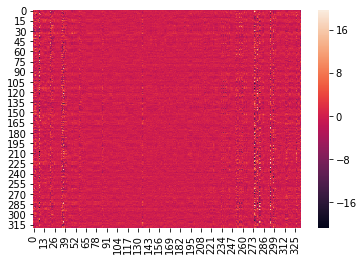

In [7]:
np.mean(ds)
sns.heatmap(ds)

In [8]:
# Load in the condition label file
conditions=np.loadtxt('regressor_shifted.csv',delimiter=',')
# cond_labels_shifted = np.zeros(cond_labels.shape)
# cond_labels_shifted[2:] = cond_labels[:-2]
# return cond_labels_shifted

In [9]:
ds = fmri_dataset (bold_fname, mask=mask_fname, targets= conditions, chunks=chunks)
print ds.summary()

Dataset: 320x333@float32, <sa: chunks,targets,time_coords,time_indices>, <fa: voxel_indices>, <a: imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>
stats: mean=-3.323e-06 std=1.52329 var=2.3204 min=-20.7587 max=19.6356

Counts of targets in each chunk:
  chunks\targets 0.0 1.0 2.0 3.0 4.0
                 --- --- --- --- ---
       1.0        56  6   6   6   6
       2.0        56  6   6   6   6
       3.0        56  6   6   6   6
       4.0        56  6   6   6   6

Summary for targets across chunks
  targets mean std min max #chunks
    0      56   0   56  56    4
    1       6   0   6   6     4
    2       6   0   6   6     4
    3       6   0   6   6     4
    4       6   0   6   6     4

Summary for chunks across targets
  chunks mean std min max #targets
    1     16   20  6   56     5
    2     16   20  6   56     5
    3     16   20  6   56     5
    4     16   20  6   56     5
Sequence statistics for 320 entries from set [0.0, 1.0, 2.0, 3.0, 4.0]
Counter-balance table for

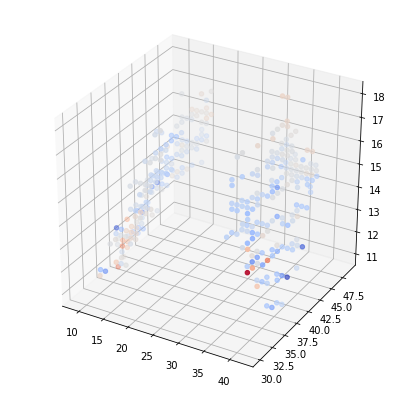

In [10]:
fig = plt.figure(figsize= (7,7))
ax = plt.axes(projection='3d')
vol=ds.fa.voxel_indices
x = vol[:,0]
y = vol[:,1]
z = vol[:,2]
ax.scatter3D(x,y,z, c= np.ravel(ds[0,:]),cmap='coolwarm') #ravel to conpress; Let's look at the first TR with 92 TR
# Good demonstration that spatial info can be preserved

1 = words

2 = faces

3 = tools/shapes

4 = numbers

In [11]:
words = ds.targets == 1
faces = ds.targets == 2
shapes = ds.targets == 3
numbers = ds.targets == 4

In [12]:
words_allTR = ds[words,:]
faces_allTR = ds[faces,:]
shapes_allTR = ds[shapes,:]
numbers_allTR = ds[numbers,:]
words_mean = np.mean(words_allTR,axis=0)
faces_mean = np.mean(faces_allTR,axis=0)
shapes_mean = np.mean(shapes_allTR,axis=0)
numbers_mean = np.mean(numbers_allTR,axis=0)

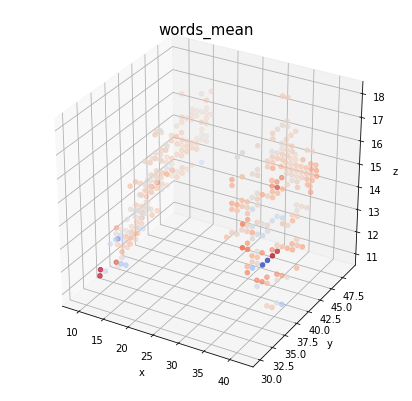

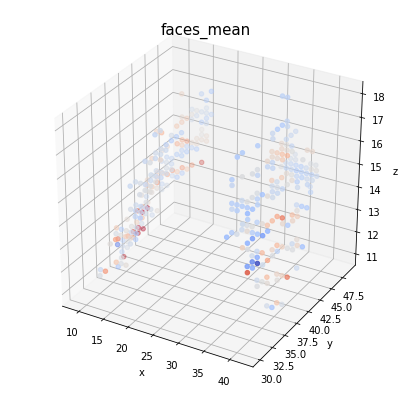

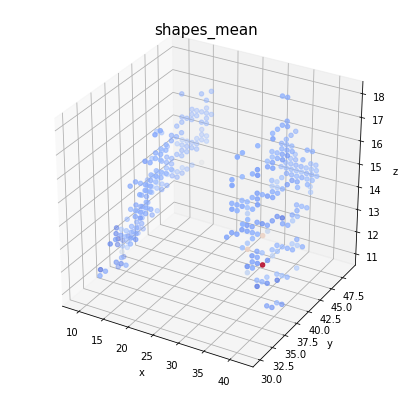

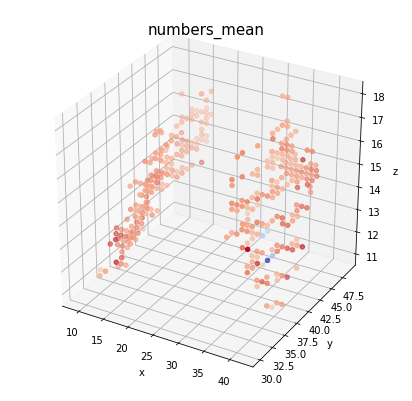

In [13]:
vol=ds.fa.voxel_indices
x = vol[:,0]
y = vol[:,1]
z = vol[:,2]

# Here I ploted four objects, each one has many pictures, so we goanna look at the mean pic of each.
cantlon = [words_mean,faces_mean,shapes_mean,numbers_mean]
cantlon_titles = ["words_mean","faces_mean","shapes_mean","numbers_mean"]

for i in range(len(cantlon)):
    fig = plt.figure(figsize= (7,7))
    ax = plt.axes(projection='3d')
    ax.scatter3D(x,y,z, c= np.ravel(cantlon[i]),cmap='coolwarm')
    ax.set_title (cantlon_titles[i],fontsize=15)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    

Text(0,0.5,'y')

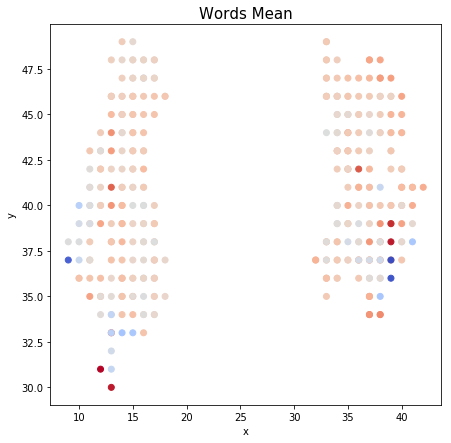

In [14]:
# 3D project to 2D
fig = plt.figure(figsize= (7,7))
ax = plt.axes()
vol=ds.fa.voxel_indices
x = vol[:,0]
y = vol[:,1]
z = vol[:,2]
ax.scatter(x,y, c= np.ravel(words_mean),cmap='coolwarm') #take all 
ax.set_title ('Words Mean',fontsize=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.set_zlabel("z")

In [15]:
orig_data = ds.a.mapper.reverse(ds.samples)
m = fmri_dataset('fus_mask.nii')

In [16]:
orig_mask = m.a.mapper.reverse(m.samples)

In [17]:
orig_mask.shape

(1, 52, 61, 48)

In [18]:
orig_data.shape

(320, 52, 61, 48)

In [19]:
new_data = orig_mask * orig_data

In [20]:
new_data.shape[0]

320

In [21]:
sum_var_all=[]
# loop over TR
for i in range(new_data.shape[0]):
    TR=new_data[i,:,:,:]
    coeff = pywt.wavedecn(TR, 'haar')
    len(coeff)
    len(coeff[-1])

    sum_var=[]
    
    for j in range(len(coeff)-1):
        level=j+1
        # coeff[-level] is now a dictionary
        aad = coeff[-level]['aad']
        ada = coeff[-level]['ada']
        daa = coeff[-level]['daa']
        add = coeff[-level]['aad']
        dad = coeff[-level]['dad']
        dda = coeff[-level]['dda']
        ddd = coeff[-level]['ddd']
        sum_var.append(aad.var() +ada.var() +daa.var()+add.var() +dad.var() +dda.var()+ddd.var())
    sum_var_all.append(sum_var)
print 'sum var for all TRs=',sum_var_all # each numer describes the new feature for each level, then we have 5 new features based one 5 levels.

sum var for all TRs= [[0.019130316, 0.04476833, 0.0976783, 0.18859941, 0.26753065], [0.018397123, 0.042528242, 0.09208244, 0.17533426, 0.2490727], [0.05034536, 0.08051394, 0.12049743, 0.1336599, 0.10076508], [0.03716271, 0.08031998, 0.09570108, 0.053364765, 0.033705942], [0.03835515, 0.06158612, 0.10383723, 0.13722262, 0.20945463], [0.044499874, 0.040043913, 0.055196404, 0.06651899, 0.06749832], [0.025504932, 0.046526767, 0.11465175, 0.25975576, 0.3406074], [0.029679585, 0.057732314, 0.0882687, 0.1269807, 0.20038456], [0.018316293, 0.024990283, 0.030663248, 0.024825918, 0.01058639], [0.023279658, 0.045091096, 0.058732197, 0.06006004, 0.028226182], [0.023143914, 0.069398455, 0.09807555, 0.19013774, 0.2614227], [0.03510387, 0.0787537, 0.11967786, 0.2946968, 0.3148421], [0.037696615, 0.042453732, 0.06399954, 0.022123821, 0.0027798237], [0.023960905, 0.047493223, 0.08640184, 0.108206145, 0.09753129], [0.025359318, 0.06470727, 0.17383866, 0.35362312, 0.3882492], [0.030446129, 0.0707946, 0.1

/anaconda3/envs/py2/lib/python2.7/site-packages/mvpa2/clfs/distance.py:160: FutureWarning: Conversion of the second argument of issubdtype from `'f'` to `np.floating` is deprecated. In future, it will be treated as `np.float32 == np.dtype('f').type`.
  if not np.issubdtype(data1.dtype, 'f') \


Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

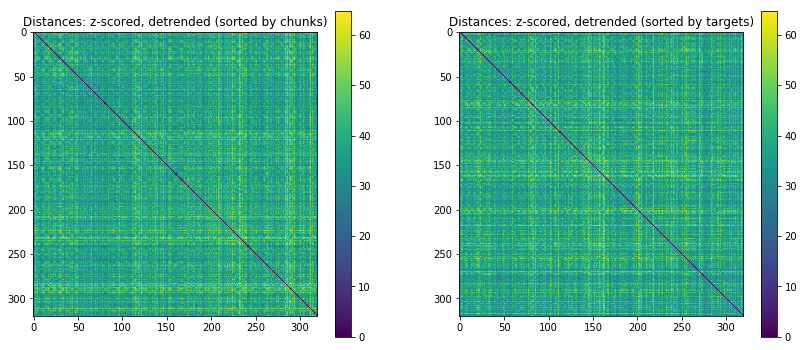

In [22]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [23]:
#preprocessing and get rid of resting state
poly_detrend(ds, polyord=1, chunks_attr='chunks')
zscore(ds, param_est=('targets', [0]))
ds = ds[ds.sa.targets != 0]

/anaconda3/envs/py2/lib/python2.7/site-packages/mvpa2/mappers/detrend.py:325: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  fit = np.linalg.lstsq(regs, ds.samples)


Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

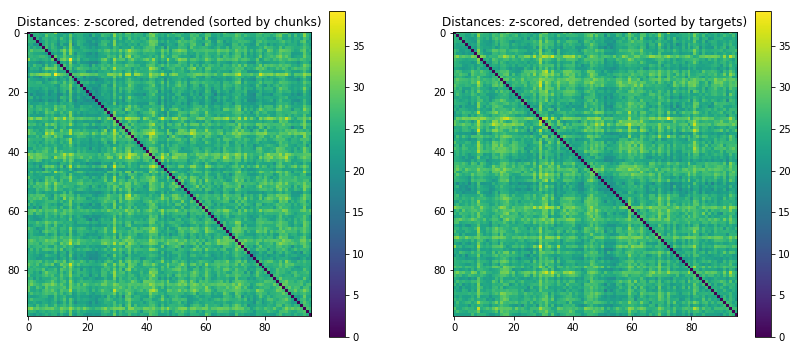

In [24]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [25]:
clf = kNN(k=1, dfx=one_minus_correlation, voting='majority')
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results = cvte(ds)
KNN_orig = np.mean(cv_results)
print 'Mean accuracy KNN_Orig=', KNN_orig
print
# test the significance
t, p = stats.ttest_1samp(cv_results,.25)
print 't_value=', t
print 'p_value_orig=', p
print
print 'Accuracy for each run=', cv_results.samples

Mean accuracy KNN_Orig= 0.3958333333333333

t_value= [3.65563078]
p_value_orig= [0.03535285]

Accuracy for each run= [[0.29166667]
 [0.45833333]
 [0.375     ]
 [0.45833333]]


In [26]:
# Try different classifers-SVM
clf = LinearCSVMC()
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results_svm= cvte(ds)
SVM_orig = np.mean(cv_results_svm)
print 'Mean accuracy SVM_orig=',SVM_orig
print
# Test the results significance
t_svm, p_svm= stats.ttest_1samp(cv_results_svm,.25)
print
print 't_value_svm=', t_svm
print 'p_value_svm=', p_svm

Mean accuracy SVM_orig= 0.4583333333333333


t_value_svm= [6.12372436]
p_value_svm= [0.00875441]


/anaconda3/envs/py2/lib/python2.7/site-packages/mvpa2/clfs/libsvmc/svm.py:215: FutureWarning: Conversion of the second argument of issubdtype from `'c'` to `str` is deprecated. In future, it will be treated as `np.string_ == np.dtype('c').type`.
  if ( np.issubdtype(self.ca.trained_targets.dtype, 'c') or
/anaconda3/envs/py2/lib/python2.7/site-packages/mvpa2/clfs/libsvmc/svm.py:216: FutureWarning: Conversion of the second argument of issubdtype from `'U'` to `unicode` is deprecated. In future, it will be treated as `np.unicode_ == np.dtype('U').type`.
  np.issubdtype(self.ca.trained_targets.dtype, 'U') ):


In [27]:
# Try different classifers-GNB
clf = GNB()
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results_gnb= cvte(ds)
GNB_orig = np.mean(cv_results_gnb)
print 'Mean accuracy GNB_orig=',GNB_orig
print
# Test the results significance
t_gnb, p_gnb= stats.ttest_1samp(cv_results_gnb,.25)
print
print 't_new_value_gnb=', t_gnb
print 'p_new_value_gnb=', p_gnb

Mean accuracy GNB_orig= 0.47916666666666663


t_new_value_gnb= [6.35085296]
p_new_value_gnb= [0.00789784]


## Define the function to capture the spreadness of our data. 

In [28]:
ds = fmri_dataset(bold_fname, mask=mask_fname, targets=conditions, chunks=chunks)
print ds.summary()

Dataset: 320x333@float32, <sa: chunks,targets,time_coords,time_indices>, <fa: voxel_indices>, <a: imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>
stats: mean=-3.323e-06 std=1.52329 var=2.3204 min=-20.7587 max=19.6356

Counts of targets in each chunk:
  chunks\targets 0.0 1.0 2.0 3.0 4.0
                 --- --- --- --- ---
       1.0        56  6   6   6   6
       2.0        56  6   6   6   6
       3.0        56  6   6   6   6
       4.0        56  6   6   6   6

Summary for targets across chunks
  targets mean std min max #chunks
    0      56   0   56  56    4
    1       6   0   6   6     4
    2       6   0   6   6     4
    3       6   0   6   6     4
    4       6   0   6   6     4

Summary for chunks across targets
  chunks mean std min max #targets
    1     16   20  6   56     5
    2     16   20  6   56     5
    3     16   20  6   56     5
    4     16   20  6   56     5
Sequence statistics for 320 entries from set [0.0, 1.0, 2.0, 3.0, 4.0]
Counter-balance table for

In [29]:
def cal_R_sq (v_i,x_i,y_i,z_i):
    """Define the function that is gonna be used for the feature extration"""
    x_c = sum(np.abs(v_i)*x_i)/sum(np.abs(v_i))
    y_c = sum(np.abs(v_i)*y_i)/sum(np.abs(v_i))
    z_c = sum(np.abs(v_i)*z_i)/sum(np.abs(v_i))
    R_2 = sum(((x_i-x_c)**2+(y_i-y_c)**2)*np.abs(v_i))/sum(np.abs(v_i))
    return R_2

In [30]:
# turn the list above into array
new_five_feature = np.asarray(sum_var_all)
data_five_feature = np.hstack([ds, new_five_feature])
# Create a new dataset after adding in the additional label
ds_new = dataset_wizard(data_five_feature, targets=conditions, chunks=chunks)
ds_new.shape
print ds.shape
print new_five_feature.shape

(320, 333)
(320, 5)


In [31]:
print new_five_feature

[[0.01913032 0.04476833 0.0976783  0.18859941 0.26753065]
 [0.01839712 0.04252824 0.09208244 0.17533426 0.2490727 ]
 [0.05034536 0.08051394 0.12049743 0.1336599  0.10076508]
 ...
 [0.02468997 0.04824473 0.1481923  0.16837671 0.12569758]
 [0.02172804 0.034572   0.05216106 0.06369741 0.00982393]
 [0.02926127 0.07909694 0.06909473 0.06222135 0.04708271]]


Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

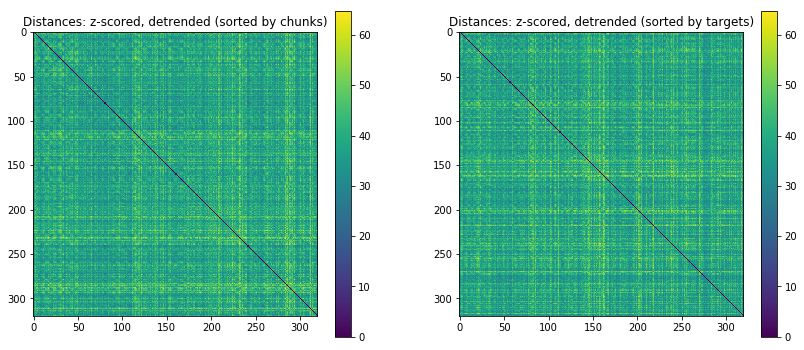

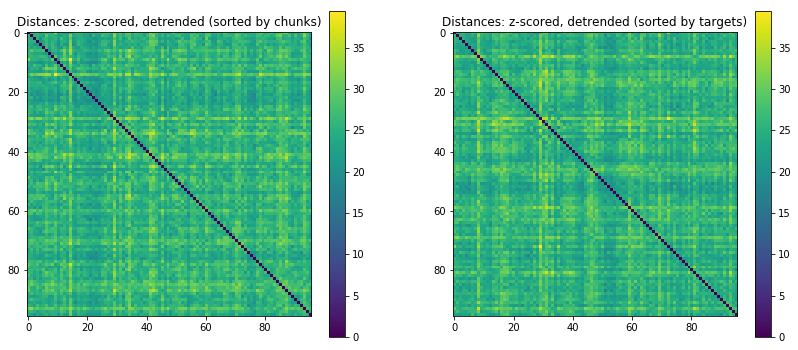

In [32]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds_new, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds_new, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

#preprocessing on the dataset with new features
poly_detrend(ds_new, polyord=1, chunks_attr='chunks')
zscore(ds_new, param_est=('targets', [0]))
ds_new = ds_new[ds_new.sa.targets != 0]

pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds_new, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds_new, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [33]:
# Classification based on new feature added
clf = kNN(k=1, dfx=one_minus_correlation, voting='majority')
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_new_results = cvte(ds_new)
KNN_new = np.mean(cv_new_results)
print 'Mean Accuracy KNN_new=', KNN_new
# Test the results significance
print
t_new, p_new = stats.ttest_1samp(cv_new_results,.25)
print 't_new_value=', t_new
print 'p_new_value=', p_new
print
print 'Accuracy for each run=', cv_new_results.samples

Mean Accuracy KNN_new= 0.40625

t_new_value= [3.38240713]
p_new_value= [0.04301491]

Accuracy for each run= [[0.29166667]
 [0.5       ]
 [0.375     ]
 [0.45833333]]


In [34]:
# Try different classifers-SVM
clf = LinearCSVMC()
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results_svm= cvte(ds_new)
SVM_new = np.mean(cv_results_svm)
print 'Mean accuracy SVM=',SVM_new
print
# Test the results significance
t_new_svm, p_new_svm= stats.ttest_1samp(cv_new_results,.25)
print
print 't_new_value_svm=', t_new_svm
print 'p_new_value_svm=', p_new_svm

Mean accuracy SVM= 0.4583333333333333


t_new_value_svm= [3.38240713]
p_new_value_svm= [0.04301491]


In [35]:
# Try different classifers-GNB
clf = GNB()
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results_gnb= cvte(ds_new)
GNB_new = np.mean(cv_results_gnb)
print 'Mean accuracy GNB=',GNB_new
print
# Test the results significance
t_new_gnb, p_new_gnb= stats.ttest_1samp(cv_results_gnb,.25)
print
print 't_new_value_gnb=', t_new_gnb
print 'p_new_value_gnb=', p_new_gnb

Mean accuracy GNB= 0.4895833333333333


t_new_value_gnb= [6.07511125]
p_new_value_gnb= [0.00895341]


In [36]:
# a= fmri_dataset('fus_mask.nii')
# a.samples[:,a.fa['voxel_indices'][:,0] < 25] = 0
# nimg = map2nifti(a)
# nimg.to_filename('masktest.nii')

In [37]:
a= fmri_dataset('fus_mask.nii')
#a.samples[:,a.fa['voxel_indices'][:,0] < 25] = 0
#nimg = map2nifti(a)
#nimg.to_filename('masktest.nii')
# plt.hist(a.samples)

In [38]:
a.samples;
np.sum(a.samples == 2);
np.sum(a.samples == 1);

In [40]:
new_five_feature.shape

(320, 5)

In [ ]:
words = ds.targets == 1
faces = ds.targets == 2
shapes = ds.targets == 3
numbers = ds.targets == 4

In [ ]:
words_allTR = ds[words,:]
faces_allTR = ds[faces,:]
shapes_allTR = ds[shapes,:]
numbers_allTR = ds[numbers,:]

In [42]:
ds.targets.shape

(320,)

In [47]:
ds.shape

(320, 333)

In [54]:
words_five_num = new_five_feature[words,:]
faces_five_num = new_five_feature[faces,:]
shapes_five_num = new_five_feature[shapes,:]
numbers_five_num = new_five_feature[numbers,:]

print words_five_num.shape
print faces_five_num.shape
print shapes_five_num.shape
print numbers_five_num.shape

(24, 5)
(24, 5)
(24, 5)
(24, 5)


In [61]:
# Since based on my theory, the first and last level will bear the most difference.
# So I would like to plot the first and the last scale level across four conditions. 

words_five_num_15 = words_five_num[:,[0,4]]
faces_five_num_15= faces_five_num [:,[0,4]]
shapes_five_num_15= shapes_five_num [:,[0,4]]
numbers_five_num_15= numbers_five_num [:,[0,4]]

words_five_num_15.shape

(24, 2)

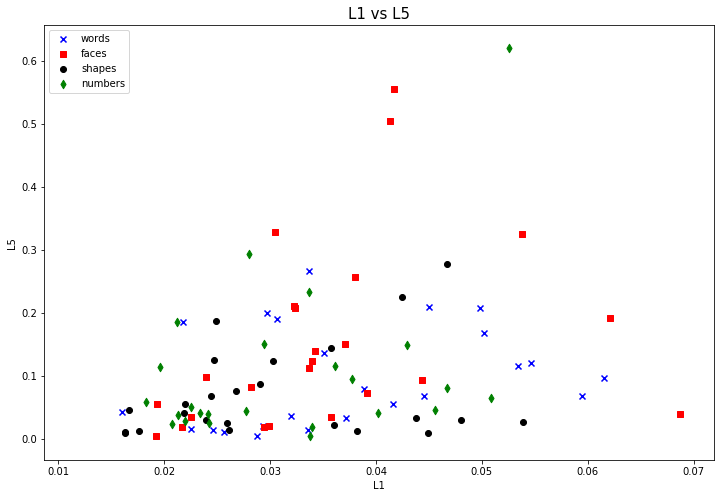

In [73]:
# The fist and last levels.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.set_title ('L1 vs L5',fontsize=15)
ax1.set_xlabel("L1")
ax1.set_ylabel("L5")

ax1.scatter(words_five_num_15[:,0],words_five_num_15[:,1], c='b', marker="x", label='words')
ax1.scatter(faces_five_num_15[:,0],faces_five_num_15[:,1], c='r', marker="s", label='faces')
ax1.scatter(shapes_five_num_15[:,0],shapes_five_num_15[:,1], c='k', marker="o", label='shapes')
ax1.scatter(numbers_five_num_15[:,0],numbers_five_num_15[:,1], c='g', marker="d", label='numbers')
plt.legend(loc='upper left');
plt.show()


In [70]:
# Since based on my theory, the first and last level will bear the most difference.
# So I would like to plot the first and the last scale level across four conditions. 

words_five_num_24 = words_five_num[:,[1,3]]
faces_five_num_24= faces_five_num [:,[1,3]]
shapes_five_num_24= shapes_five_num [:,[1,3]]
numbers_five_num_24= numbers_five_num [:,[1,3]]


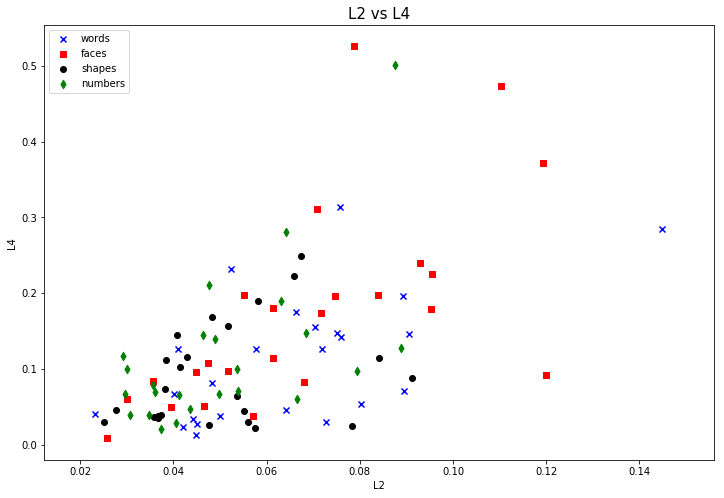

In [74]:
# The the second and fourth levels.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.set_title ('L2 vs L4',fontsize=15)
ax1.set_xlabel("L2")
ax1.set_ylabel("L4")

ax1.scatter(words_five_num_24[:,0],words_five_num_24[:,1], c='b', marker="x", label='words')
ax1.scatter(faces_five_num_24[:,0],faces_five_num_24[:,1], c='r', marker="s", label='faces')
ax1.scatter(shapes_five_num_24[:,0],shapes_five_num_24[:,1], c='k', marker="o", label='shapes')
ax1.scatter(numbers_five_num_24[:,0],numbers_five_num_24[:,1], c='g', marker="d", label='numbers')
plt.legend(loc='upper left');
plt.show()